<a href="https://colab.research.google.com/github/CoderFek/Data-Analysis-projects/blob/main/EDA%20on%20Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***CoderFek*** 

Project 2 - Netflix EDA 

Dataset available at [kaggle/dataset/netflix-shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)

# **Importing modules**

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

# **Data Collection**

In [ ]:
df = pd.read_csv("/content/netflix_titles.csv")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**The 'date_added' column has dates in the form of objects, hence we need to convert it into date time format.**

In [ ]:
df.shape

(8807, 12)

In [ ]:
# Checking data types
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**The mean is 2014, which means the graph is heavily skewed towards the right i.e. majority of movies and TV shows were released towards the end of 2018. (1925-2021)**

In [ ]:
# using str.strip() function to bring all the strings into a specified format and then converting them into 'year-month-date' format.
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format = "%B %d, %Y")

Note that we used %B for months since it has 0 padding format.

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# **Date Analysis**

<Axes: >

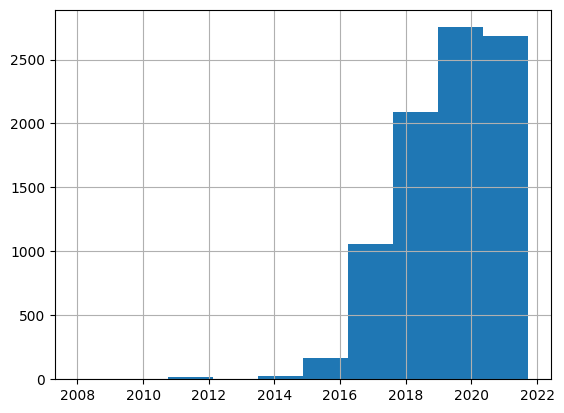

In [ ]:
df['date_added'].hist() #matplotlib version

<Axes: >

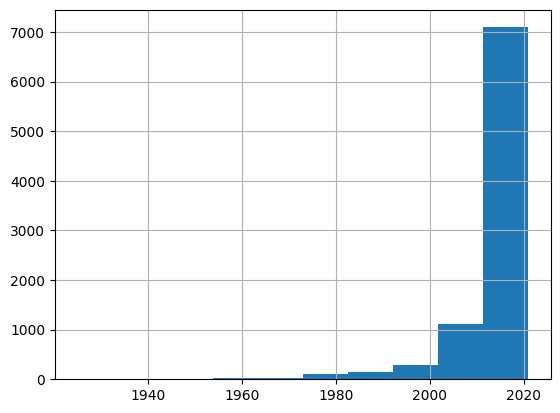

In [ ]:
df['release_year'].hist() #matplotlib version

In [ ]:
fig = px.histogram(df, x = 'release_year')
fig.update_layout(bargap = 0.2)
fig.show()
#plotly version

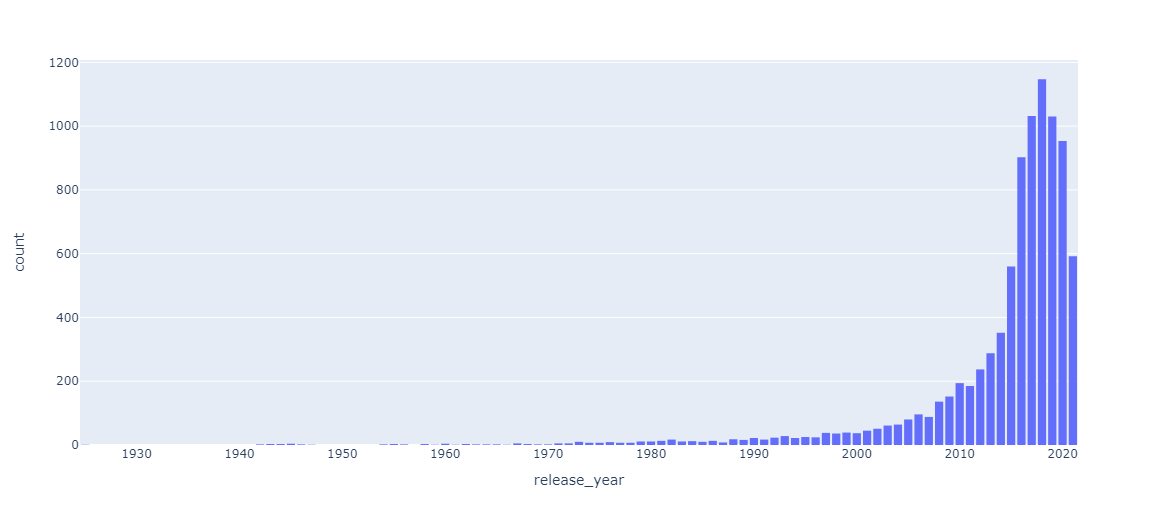

**Notice that maximum number of shows and movies were releaed in 2018 as we predicted earlier.**

**Let's have a look at the movie/TV show that was released in 1925.**

In [ ]:
x = df[df['release_year'] == 1925]
x

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


In [ ]:
fig = px.histogram(df, x = 'date_added')
fig.update_layout(bargap = 0.2)
fig.show()
#plotly version

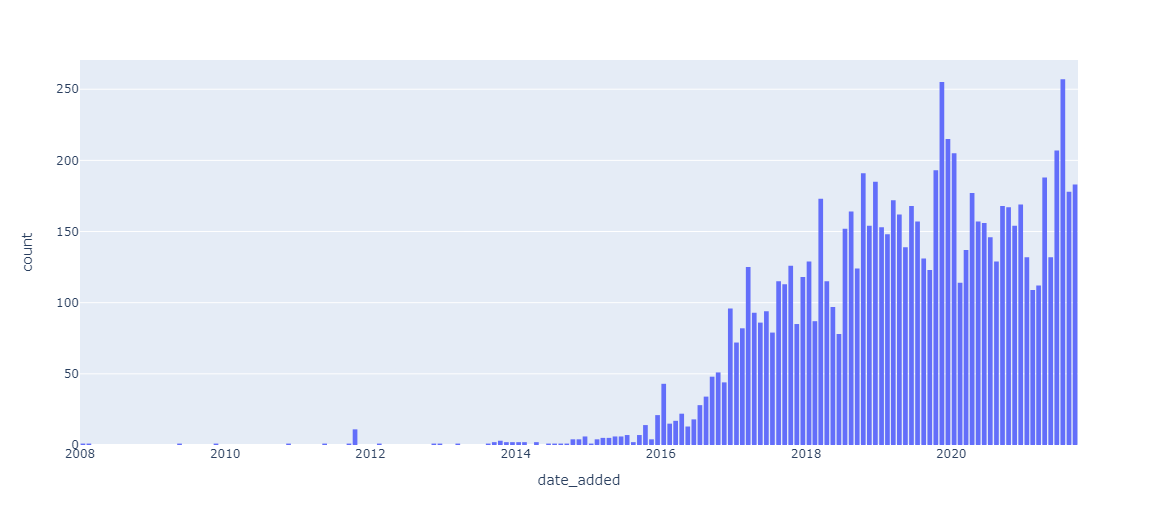

**We dont get a clear picture of which month is which, lets change the colours**

In [ ]:
# Extracting month from date_added
df['month_added'] = df['date_added'].dt.month.fillna(0)
# checking for null values
df['month_added'].isnull().sum()

0

In [ ]:
# Histogram of dates
fig = px.histogram(df, x = "date_added", color = "month_added")
fig.update_layout(bargap = 0.2)
fig.show()

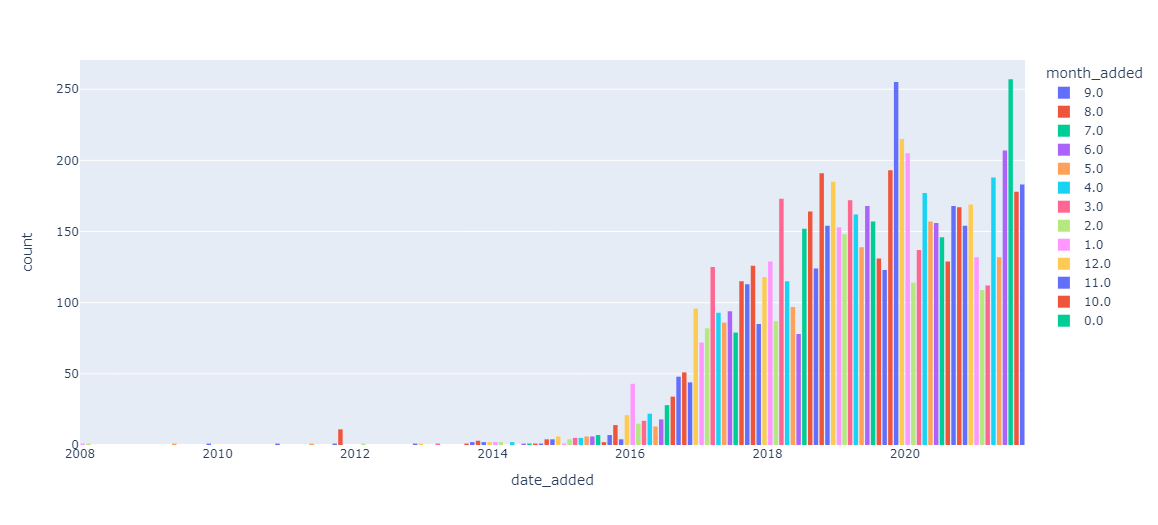

In [ ]:
# Histogram of months
fig = px.histogram(df, x = 'month_added')
fig.show()

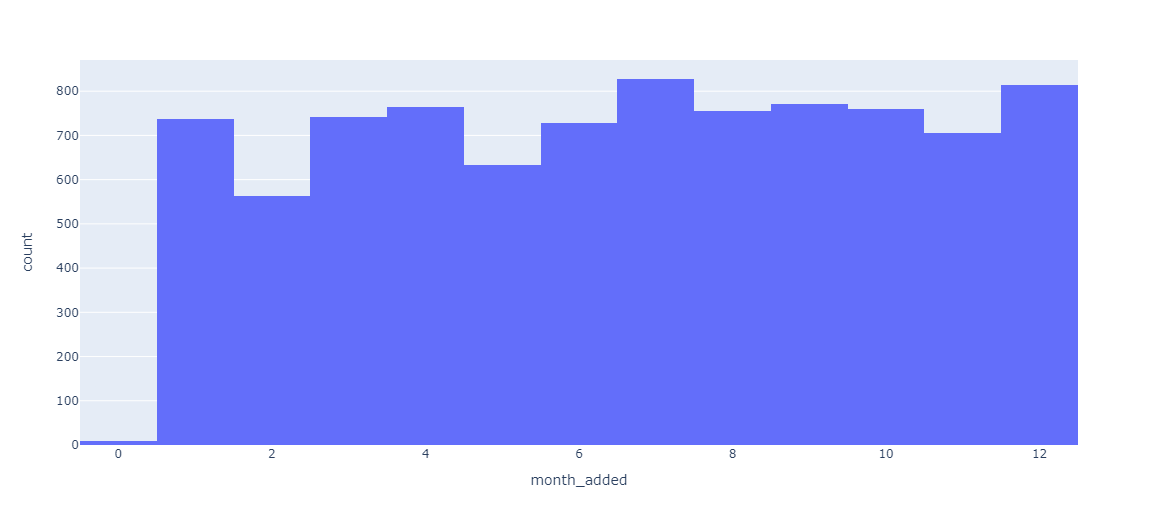

**No specific trend in month**

In [ ]:
# Extracting days from date_added
df['day_added'] = df['date_added'].dt.day.fillna(0)

In [ ]:
# Observing the trend
fig = px.histogram(df, x = 'day_added')
fig.show()

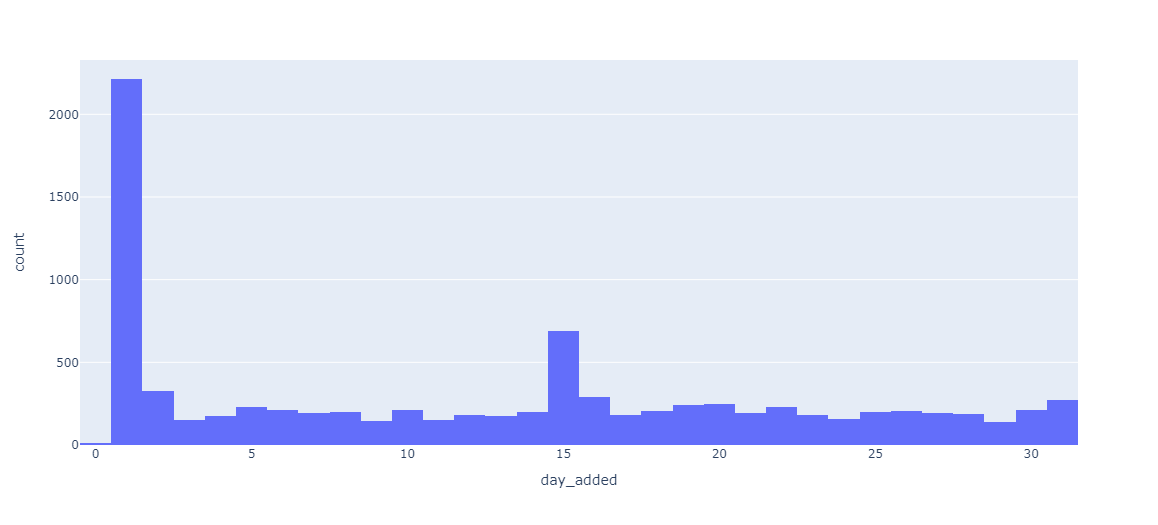

**Note that most additions are made on day 1 i.e beginning of the month followed by mid of the month. Therefore, Netflix tends to add new shows mostly in the beginning of the month.**

# **String Column Analysis**

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'day_added'],
      dtype='object')

In [ ]:
# Checking for all unique values in the 'type' column
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
# Splitting movies and TV shows for each month
fig = px.histogram(df, x = 'month_added', color = 'type')
fig.show()

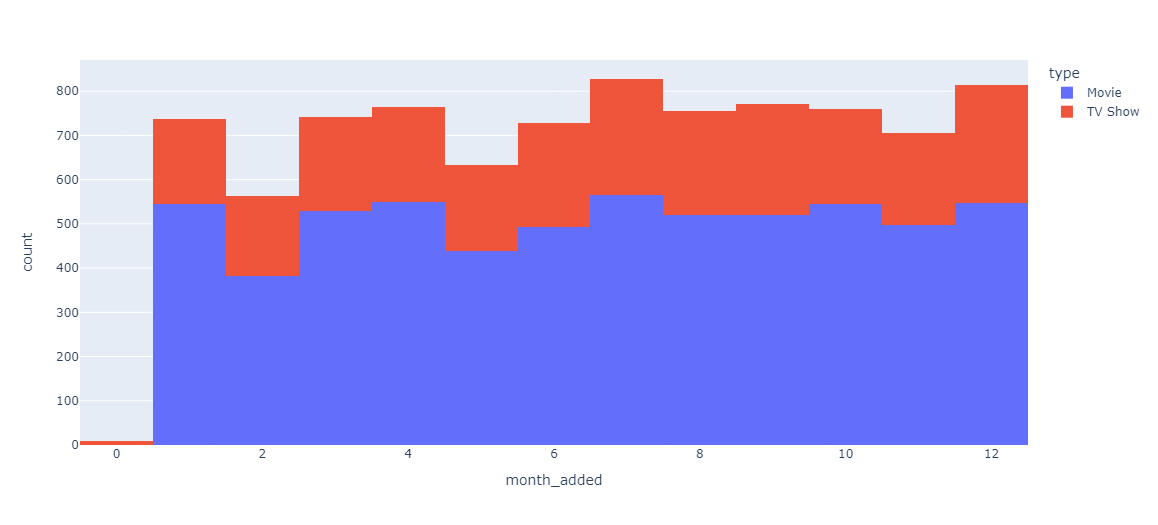

**Notice that the number of movies is greater than the number of TV shows**

In [ ]:
# lets split on the basis of days
fig = px.histogram(df, x = 'day_added', color = 'type')
fig.show()

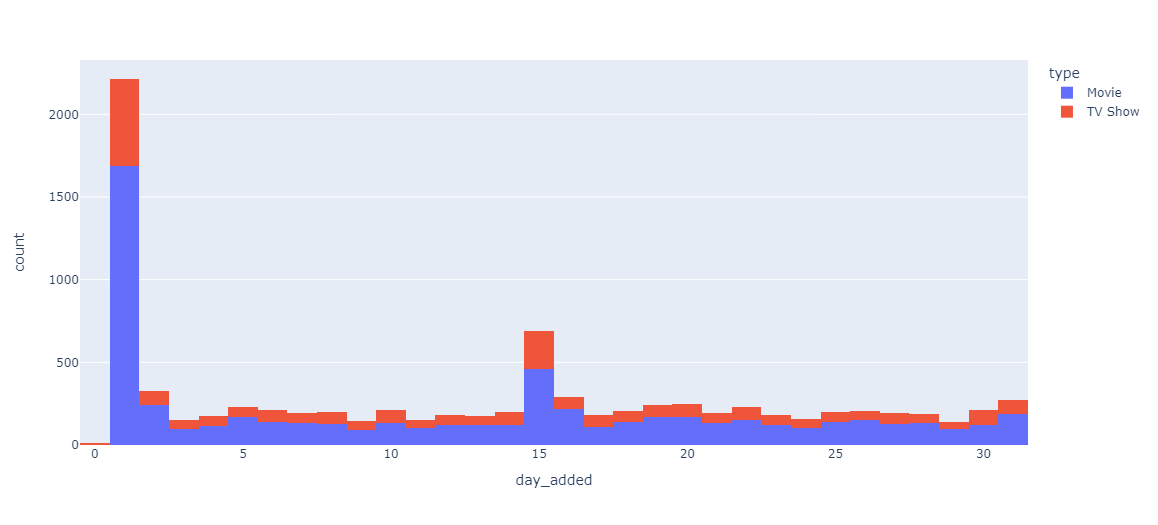

**Its 1:3 split,  which means one quarter of the things come in from TV shows, and the other three quarters come in from movies. This maybe due to the reason that its a bit easier to get rights on movies as comapared to TV shows.**

In [ ]:
df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [ ]:
# Checking the credit of each country in a given Movie or TV show
x = df['country'].str.split(",", expand = True)
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,United States,None,None,None,None,None,None,None,None,None,None,None
1,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,United States,None,None,None,None,None,None,None,None,None,None,None
8803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8804,United States,None,None,None,None,None,None,None,None,None,None,None
8805,United States,None,None,None,None,None,None,None,None,None,None,None


**There is a maximum of 12 countries contribution in a given movie or TV show in the dataset**

In [ ]:
# Creating a copy of the dataset and concatenating it with itself and dataframe x
country_count = df.copy()
country_count = pd.concat([country_count, x], axis = 1) 
country_count = country_count.melt(id_vars = ['type','title'], value_vars = range(12), value_name = "Country")
country_count

,type,title,variable,Country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
2,TV Show,Ganglands,0,NaN
3,TV Show,Jailbirds New Orleans,0,NaN
4,TV Show,Kota Factory,0,India
...,...,...,...,...
105679,Movie,Zodiac,11,None
105680,TV Show,Zombie Dumb,11,NaN
105681,Movie,Zombieland,11,None
105682,Movie,Zoom,11,None


In [ ]:
country_count = country_count[country_count['Country'].notna()]
country_count

,type,title,variable,Country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


In [ ]:
px.histogram(country_count, x = 'Country', color = 'type')

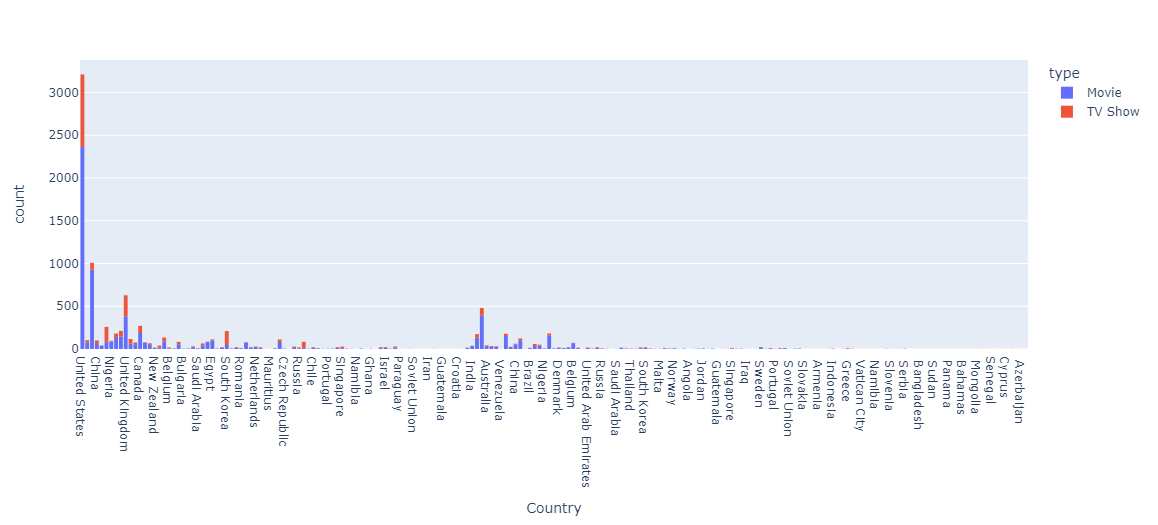

**United state appears two times, this is beacause the data isn't clean and we need to strip the string.**

In [ ]:
country_count['Country'] = country_count['Country'].str.strip()
country_count

<ipython-input-29-efb2d18ba2c0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,type,title,variable,Country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


In [ ]:
px.histogram(country_count, x = 'Country', color = 'type')

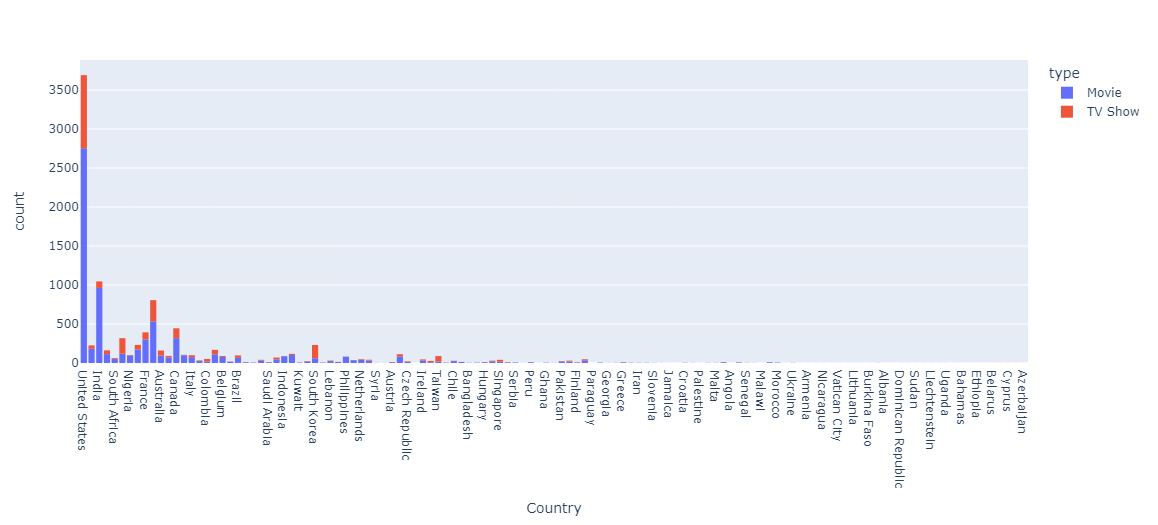

In [ ]:
# Sorting the plot
px.histogram(country_count, x = 'Country', color = 'type').update_xaxes(categoryorder = 'total descending')

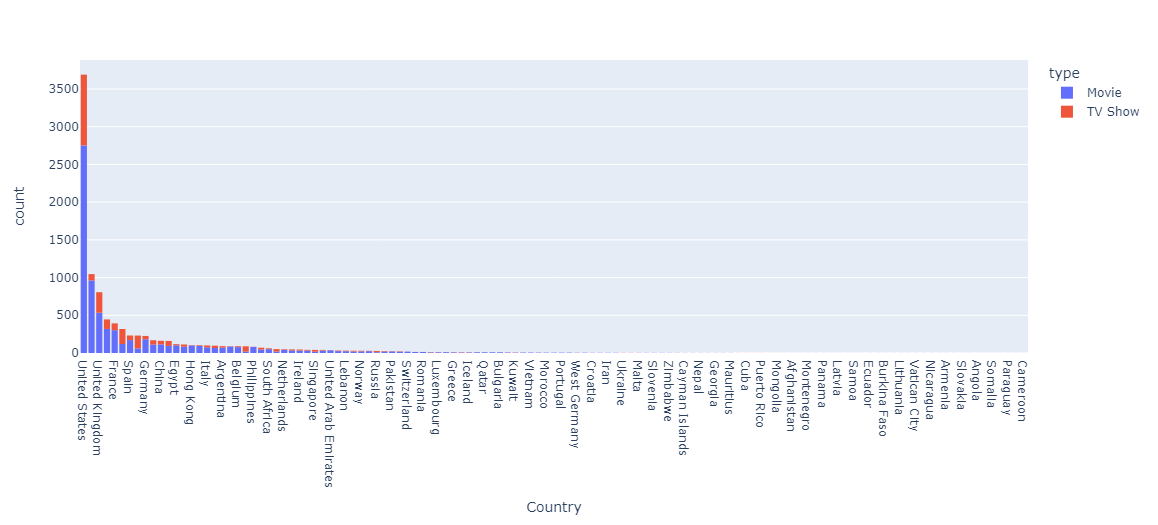

**Clearly, USA has the maximum contribution followed by India. Also, South Korea has more contribution on TV shows than movies(K-Drama).**